In [23]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import random


# Konstanten
NUM_PERSONS = 500
INFLUENCER_NET_REACH = 0.15
INFLUENCER_CONVINCING_PROB = 0.2
FRIEND_SINGLE_BUYING_PROB = 0.10
FRIEND_MULTIPLE_BUYING_PROB = 0.20

#0.8
#0.05
#[0.0, 0.0, 0.006, 0.014, 0.029]


#0.1
#0.15
#[0.0, 0.0, 0.027, 0.06, 0.101]

def count_buying_nodes(G):
    """Zählt die Anzahl der Knoten im Graphen G mit dem Zustand 'Kauf'."""
    return sum(1 for _, attributes in G.nodes(data=True) if attributes['state'] == "Kauf")
node_kauf_list = []

In [26]:

def visualize_graph_with_purchases(G, title, pos):
    plt.figure(figsize=(11.7, 8.3))
    #pos = nx.spring_layout(G)
    
    # Zeichne alle Knoten im Zustand "Nicht-Kauf" in Grau
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=[n for n, d in G.nodes(data=True) if d['state'] == "Nicht-Kauf"],
                           node_color='grey', 
                           alpha=0.6, 
                           node_size=50)
    
    # Zeichne alle Knoten im Zustand "Kauf" in Grün
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=[n for n, d in G.nodes(data=True) if d['state'] == "Kauf" and n != influencer_node],
                           node_color='blue', 
                           alpha=0.6, 
                           node_size=50)
    
   
    
    # Zeichne alle Kanten in Grau
    nx.draw_networkx_edges(G, pos, 
                           edgelist=[e for e in G.edges if influencer_node not in e], 
                           alpha=0.2)
    

    #kauf_edges = [(u, v) for u, v in G.edges if G.nodes[u]['state'] == "Kauf" or G.nodes[v]['state'] == "Kauf"]
    kauf_edges = [(u, v) for u, v in G.edges if  G.nodes[v]['state'] == "Kauf"]
    # Zeichne die "Kauf"-Kanten in Blau
    nx.draw_networkx_edges(G, pos, 
                           edgelist=kauf_edges, 
                           edge_color='violet', 
                           alpha=0.6)
    
    '''
    # Zeichne den Influencer-Knoten in Rot
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=[influencer_node],
                           node_color='red', 
                           alpha=0.6, 
                           node_size=100)
    
    # Zeichne die Kanten des Influencers in Rot
    nx.draw_networkx_edges(G, pos, 
                           edgelist=[e for e in G.edges(influencer_node)], 
                           edge_color='red', 
                           alpha=0.2)
    '''
    plt.title(title)
    plt.axis('off')
    plt.show()




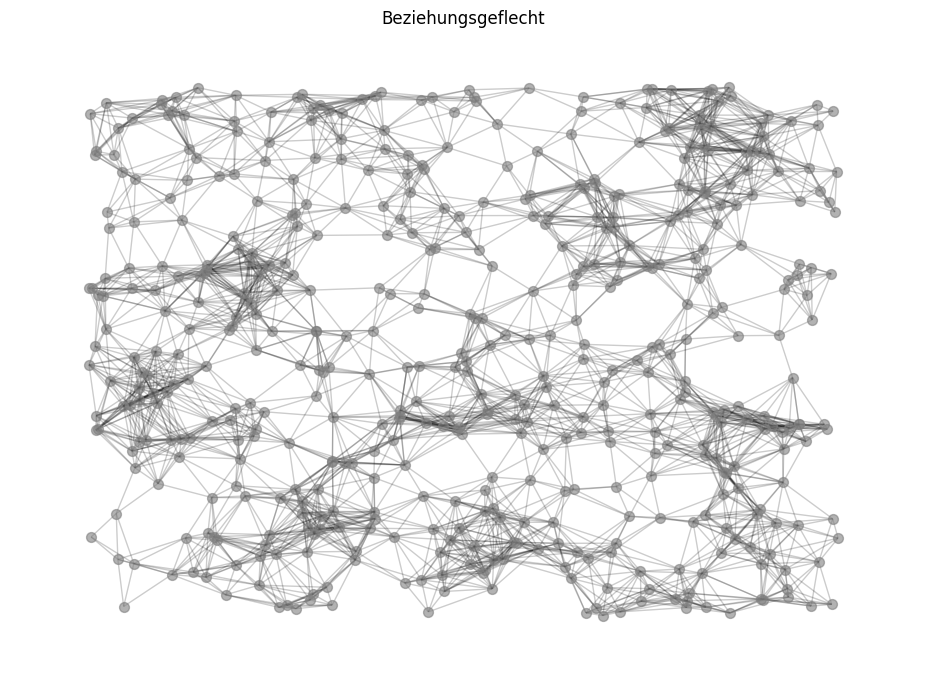

In [27]:

# Initialisiere das Graph-Netzwerk erneut
G = nx.Graph()

#Schritt 1: Initialisierung
#G = nx.watts_strogatz_graph(n=NUM_PERSONS, k=10, p=0.1, seed=42)
G = nx.random_geometric_graph(NUM_PERSONS, 0.1) # Random Clustered graph 1000 nodes - distance =0.05, no self loops

# Allen Knoten die Attribute 'type' und 'state' hinzufügen
nx.set_node_attributes(G, "Person", "type")
nx.set_node_attributes(G, "Nicht-Kauf", "state")

#Setze Influencer manuell
influencer_node = "Kampagne"
G.add_node(influencer_node, state="Influencer", type="Kauf")
# Setze eine spezifische Position für den Influencer-Knoten (z.B. (0.5, 0.5) für die Mitte)
G.nodes[influencer_node]['pos'] = (0.5, 1.1)



node_kauf_list.append(count_buying_nodes(G))

pos = nx.get_node_attributes(G, "pos")
# Visualisiere den Graphen
visualize_graph_with_purchases(G, "Beziehungsgeflecht", pos)


('Kampagne', 'Influencer', 'Kauf') 100


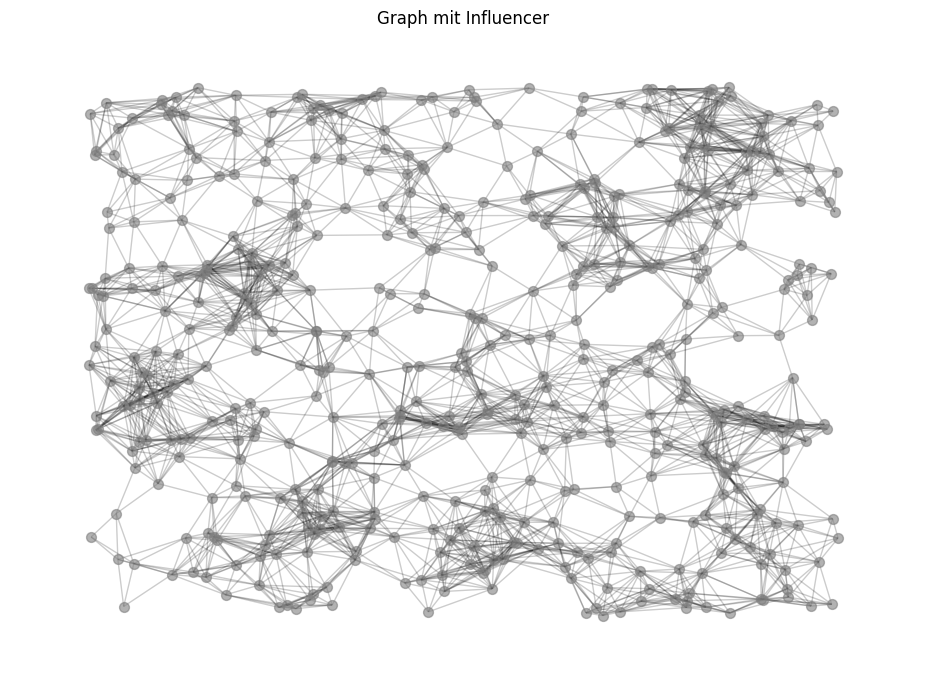

In [28]:
#Schritt 2: Erstellen eines Influencers mit Wahrscheinlichkeit p (INFLUENCER_NET_REACH) für Verbindungen mit dem Netwerk


# Verbinde den Influencer-Knoten zufällig mit 20% der anderen Knoten
num_connections = int(0.20 * len(G.nodes))
nodes_to_connect = random.sample(list(G.nodes)[:-1], num_connections)  # -1, um den Influencer selbst auszuschließen

for node in nodes_to_connect:
    G.add_edge(influencer_node, node)

node_kauf_list.append(count_buying_nodes(G))

# Überprüfe, ob der Influencer-Knoten erfolgreich hinzugefügt wurde und mit der erwarteten Anzahl von Knoten verbunden ist
influencer_attributes = (influencer_node, G.nodes[influencer_node]['state'], G.nodes[influencer_node]['type'])
num_connected_nodes = len(list(G.neighbors(influencer_node)))

print(influencer_attributes, num_connected_nodes)



# Visualisiere den Graphen
visualize_graph_with_purchases(G, "Graph mit Influencer", pos)


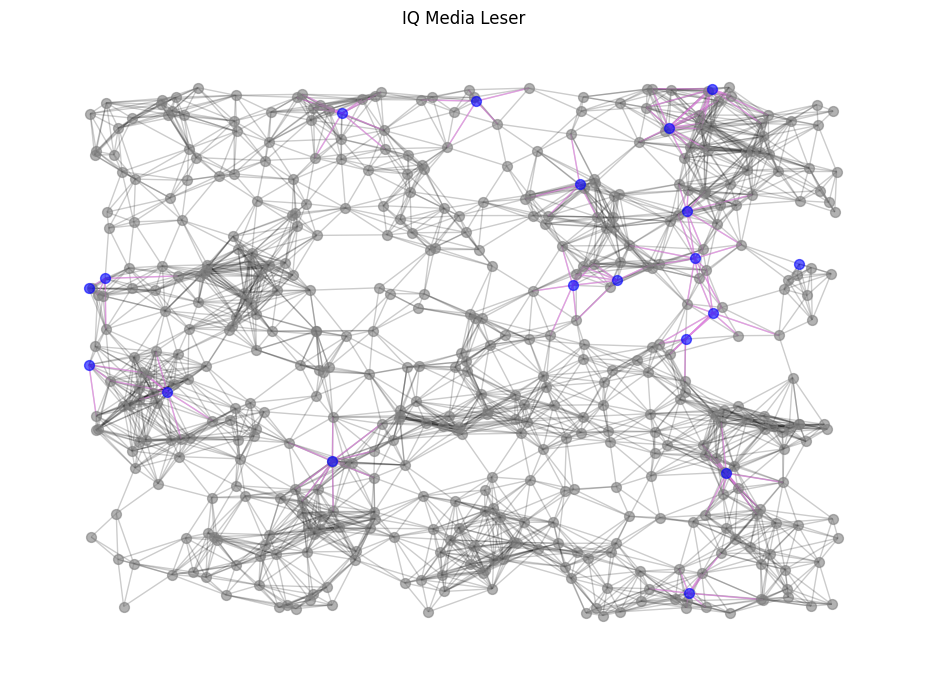

In [29]:
# Schritt 3: Knoten, die vom Influencer überzeugt wurden, aktualisieren
for neighbor in G.neighbors(influencer_node):
    if random.random() < INFLUENCER_CONVINCING_PROB:
        G.nodes[neighbor]['state'] = "Kauf"

node_kauf_list.append(count_buying_nodes(G))

# Visualisiere den aktualisierten Graphen
visualize_graph_with_purchases(G, "IQ Media Leser mit direktem Netzwerk", pos)



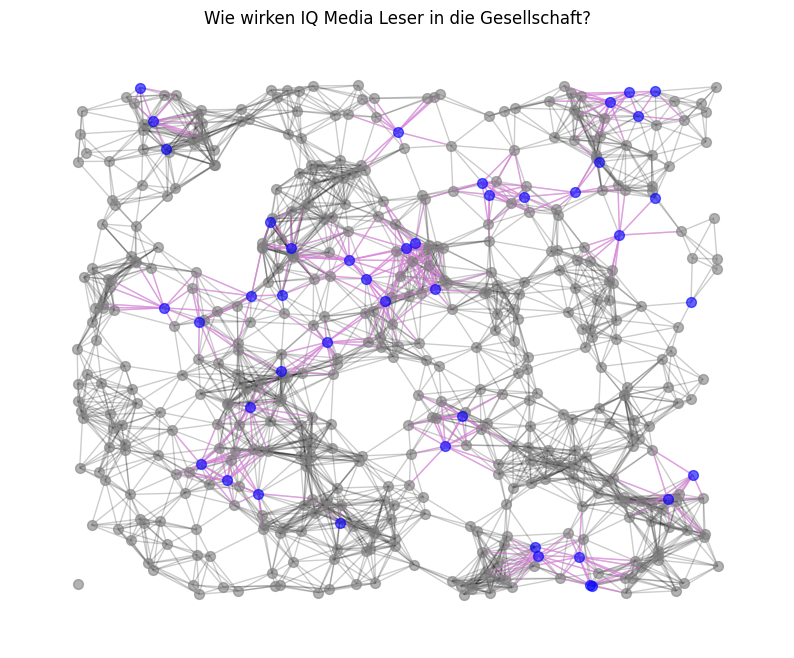

In [16]:
#Step 4: Überzeugung durch Freunde
for person, attributes in G.nodes(data=True):
    if attributes['state'] == "Nicht-Kauf":
        buying_neighbors_count = sum(1 for neighbor in G.neighbors(person) if G.nodes[neighbor]['state'] == "Kauf")
        
        if buying_neighbors_count == 1 and random.random() < FRIEND_SINGLE_BUYING_PROB:
            G.nodes[person]['state'] = "Kauf"
        elif buying_neighbors_count > 2 and random.random() < FRIEND_MULTIPLE_BUYING_PROB:
            G.nodes[person]['state'] = "Kauf"

node_kauf_list.append(count_buying_nodes(G))

# Visualisiere den aktualisierten Graphen nach der Überzeugung durch Freunde
visualize_graph_with_purchases(G, "Wie wirken IQ Media Leser in die Gesellschaft?", pos)

[0.0, 0.0, 0.042, 0.088, 0.166]


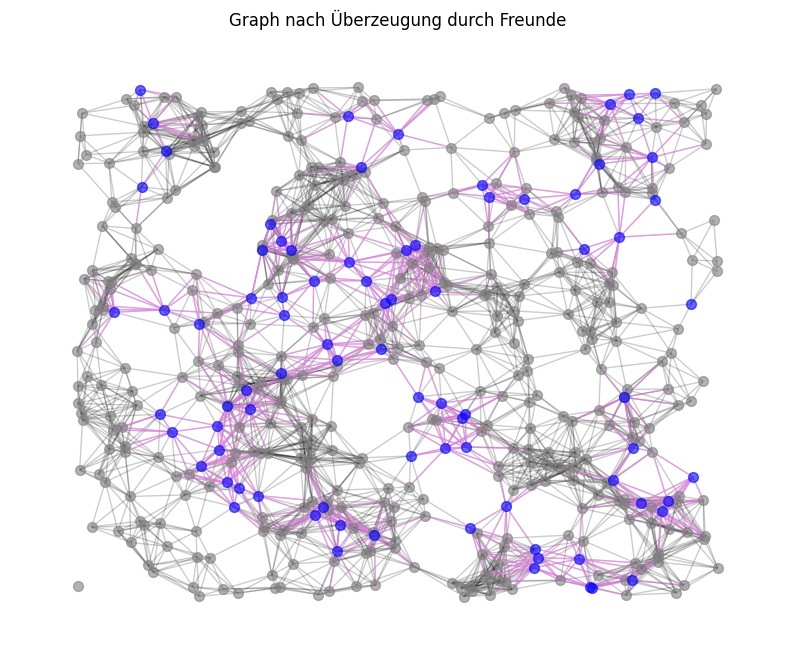

In [17]:
#Step 5: Weitere Runde
for person, attributes in G.nodes(data=True):
    if attributes['state'] == "Nicht-Kauf":
        buying_neighbors_count = sum(1 for neighbor in G.neighbors(person) if G.nodes[neighbor]['state'] == "Kauf")
        
        if buying_neighbors_count == 1 and random.random() < FRIEND_SINGLE_BUYING_PROB:
            G.nodes[person]['state'] = "Kauf"
        elif buying_neighbors_count > 2 and random.random() < FRIEND_MULTIPLE_BUYING_PROB:
            G.nodes[person]['state'] = "Kauf"

node_kauf_list.append(count_buying_nodes(G))
pct_list = [x / NUM_PERSONS for x in node_kauf_list]
print(pct_list)
# Visualisiere den aktualisierten Graphen nach der Überzeugung durch Freunde
visualize_graph_with_purchases(G, "Graph nach Überzeugung durch Freunde", pos)